In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(49.67642099808626, 160.8230189527667),
 (57.947263778830774, 123.47114565768459),
 (-55.63421123646898, 105.88447294746078),
 (-11.258056028155423, -32.266741221447376),
 (26.982414100544545, -139.16753093461233),
 (-25.56736255631408, -64.51803965882986),
 (32.522267061166204, -47.110455196956735),
 (-41.01800377647017, 11.902270223897489),
 (-47.54121407841084, -27.69942209275908),
 (76.84174746390016, 119.0534500136032),
 (48.62632727838536, -48.96165066155362),
 (71.26374934988254, -166.84160447964163),
 (-86.16856011989846, 8.144173494696673),
 (-68.05383484869498, -170.03958308294642),
 (-23.94091645988962, -128.57516435832187),
 (-79.41796096914429, -39.30524826788667),
 (-68.05377420470106, -103.14917545530102),
 (-24.307756455925713, -60.03462865758311),
 (-47.511665873760435, 72.71588979105991),
 (28.136167807228162, -67.94874000301756),
 (-20.243363606282685, -6.3556351827247966),
 (-65.92491445863445, -56.033271960485635),
 (-85.8801375284969, -148.1157673642674),
 (-28.3

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 2 of Set 1 | neryungri
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | maragogi
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | salta
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | pozo colorado
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | sao joao da barra
Processing Record 23 of Set 1

Processing Record 38 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 39 of Set 4 | nanortalik
Processing Record 40 of Set 4 | aklavik
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | great falls
Processing Record 43 of Set 4 | tucupita
Processing Record 44 of Set 4 | ucluelet
Processing Record 45 of Set 4 | panorama
Processing Record 46 of Set 4 | libertador general san martin
Processing Record 47 of Set 4 | awjilah
Processing Record 48 of Set 4 | san antonio
Processing Record 49 of Set 4 | nikolskoye
Processing Record 50 of Set 4 | tuktoyaktuk
Processing Record 1 of Set 5 | caravelas
Processing Record 2 of Set 5 | marsabit
Processing Record 3 of Set 5 | ruidoso
Processing Record 4 of Set 5 | meulaboh
Processing Record 5 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 6 of Set 5 | nang rong
Processing Record 7 of Set 5 | filingue
Processing Record 8 of Set 5 | nizhnyaya salda
Processing Record 9 of Set 5 | zyryanka
Processin

Processing Record 25 of Set 8 | bandarbeyla
Processing Record 26 of Set 8 | konevo
Processing Record 27 of Set 8 | purgstall
Processing Record 28 of Set 8 | lanzhou
Processing Record 29 of Set 8 | kaitangata
Processing Record 30 of Set 8 | pevek
Processing Record 31 of Set 8 | stephenville
Processing Record 32 of Set 8 | udachnyy
Processing Record 33 of Set 8 | herat
Processing Record 34 of Set 8 | sorkjosen
Processing Record 35 of Set 8 | karaul
City not found. Skipping...
Processing Record 36 of Set 8 | lusambo
Processing Record 37 of Set 8 | koslan
Processing Record 38 of Set 8 | bonthe
Processing Record 39 of Set 8 | patacamaya
Processing Record 40 of Set 8 | san blas
Processing Record 41 of Set 8 | da lat
Processing Record 42 of Set 8 | san jeronimo
Processing Record 43 of Set 8 | rabo de peixe
Processing Record 44 of Set 8 | gurskoye
City not found. Skipping...
Processing Record 45 of Set 8 | longyearbyen
Processing Record 46 of Set 8 | grindavik
Processing Record 47 of Set 8 | m

Processing Record 13 of Set 12 | dyadkovskaya
City not found. Skipping...
Processing Record 14 of Set 12 | aktas
Processing Record 15 of Set 12 | belaya gora
Processing Record 16 of Set 12 | srednekolymsk
Processing Record 17 of Set 12 | havelock
Processing Record 18 of Set 12 | acajutla
Processing Record 19 of Set 12 | constancia
Processing Record 20 of Set 12 | seymour
Processing Record 21 of Set 12 | sept-iles
Processing Record 22 of Set 12 | moose factory
Processing Record 23 of Set 12 | waynesville
Processing Record 24 of Set 12 | port macquarie
Processing Record 25 of Set 12 | sumenep
Processing Record 26 of Set 12 | north bend
Processing Record 27 of Set 12 | shache
Processing Record 28 of Set 12 | cliza
Processing Record 29 of Set 12 | hachinohe
Processing Record 30 of Set 12 | farafangana
Processing Record 31 of Set 12 | ojo caliente
Processing Record 32 of Set 12 | san ramon
Processing Record 33 of Set 12 | svetlogorsk
Processing Record 34 of Set 12 | antofagasta
Processing R

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Petropavlovsk-Kamchatskiy,53.0452,158.6483,27.19,80,90,17.90,RU,2022-02-01 17:43:52
1,Neryungri,56.6709,124.6491,-11.69,95,100,8.37,RU,2022-02-01 17:43:52
2,Albany,42.6001,-73.9662,35.80,48,10,4.00,US,2022-02-01 17:43:53
3,Maragogi,-9.0122,-35.2225,84.22,64,8,9.24,BR,2022-02-01 17:43:53
4,Hilo,19.7297,-155.0900,67.24,94,100,4.61,US,2022-02-01 17:40:30
5,Salta,-24.7859,-65.4117,81.57,50,40,5.01,AR,2022-02-01 17:42:33
6,Torbay,47.6666,-52.7314,28.58,54,40,23.02,CA,2022-02-01 17:43:54
7,Cape Town,-33.9258,18.4232,76.87,63,0,3.00,ZA,2022-02-01 17:43:54
8,Cidreira,-30.1811,-50.2056,75.78,64,82,9.84,BR,2022-02-01 17:43:55
9,Saskylakh,71.9167,114.0833,-28.23,100,60,1.41,RU,2022-02-01 17:43:55


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

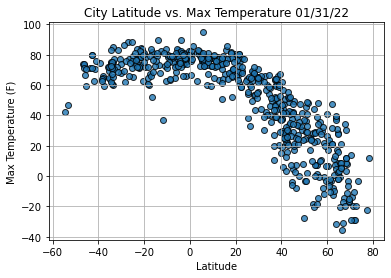

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()



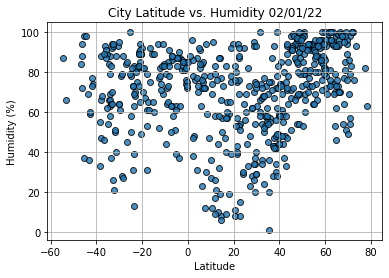

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

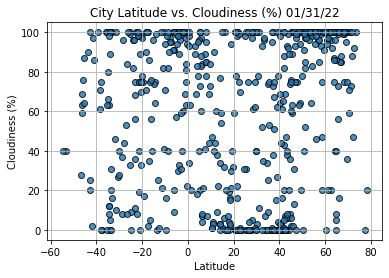

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

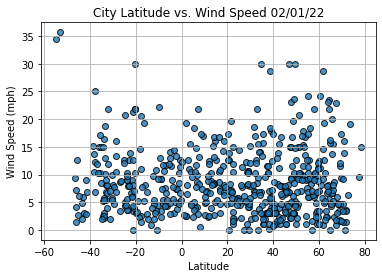

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

NameError: name 'northern_hemi_df' is not defined

/Users/Puneeth/opt/anaconda3/envs/PythonData/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


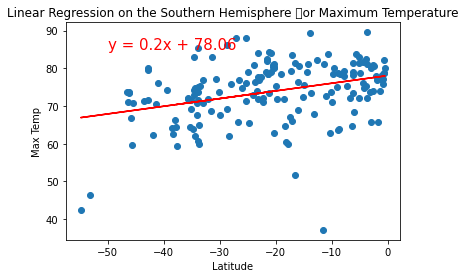

In [41]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,85))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
#plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,90))


In [ ]:
# Linear regression on the Cloudiness inNorthern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', '%cloudiness',(40,40))

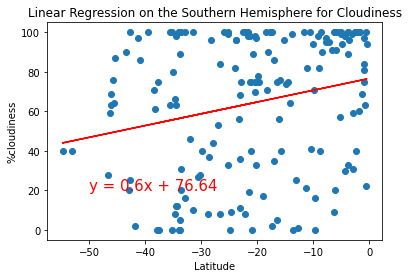

In [55]:
# Linear regression on the Cloudiness inNorthern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness', '%cloudiness',(-50,20))

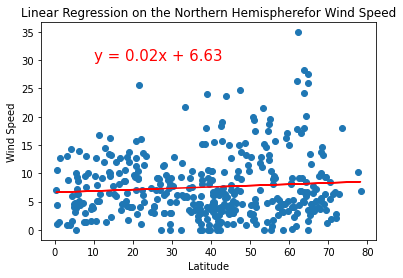

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispherefor Wind Speed', 'Wind Speed',(10,30))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))